In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

sns.set_style('darkgrid')

In [2]:
homicidios = pd.read_csv(r"C:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos Individuales\Data Analytics\Datasets\homicidios.xlsx - HECHOS.csv")

homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,1/10/2016,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,1/21/2016,2016,1,21,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [3]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  XY (CA

Buscando tener una primera impresión del dataset, se encuentra con que la mayoría de los datos no tienen datos nulos, con excepción de las variables "Altura", "Cruce", "Dirección Normalizada" y "Calle". Más adelante se analizará si aportan o no información.

In [4]:
homicidios['ID'].nunique()==homicidios.shape[0]

True

Con intención de detectar valores duplicados, se encuentra con que el dataset no tiene duplicados. Se tomó a al variable "ID" ya que es el identificador de cada accidente y no debería repetirse al contrario de las demás variables

## **`Outliers`**

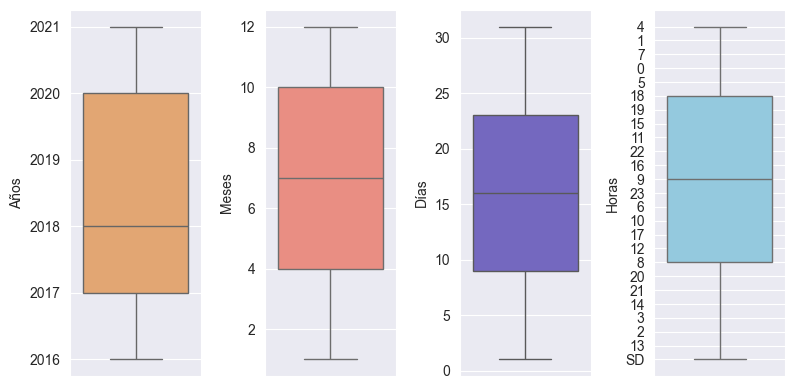

In [6]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

plt.subplot(1, 5, 1) 
sns.boxplot(data=homicidios, y='AAAA', color = "#F4A460")
plt.ylabel('Años')

plt.subplot(1, 5, 2) 
sns.boxplot(data=homicidios, y='MM', color = "#FA8072")
plt.ylabel('Meses')

plt.subplot(1, 5, 3) 
sns.boxplot(data=homicidios, y='DD', color = "#6A5ACD")
plt.ylabel('Días')

plt.subplot(1, 5, 4) 
sns.boxplot(data=homicidios, y='HH', color = "#87CEEB")
plt.ylabel('Horas')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

Ninguna de las variables numéricas contiene outliers.

## **`Correlación Entre las Variables Numéricas`**

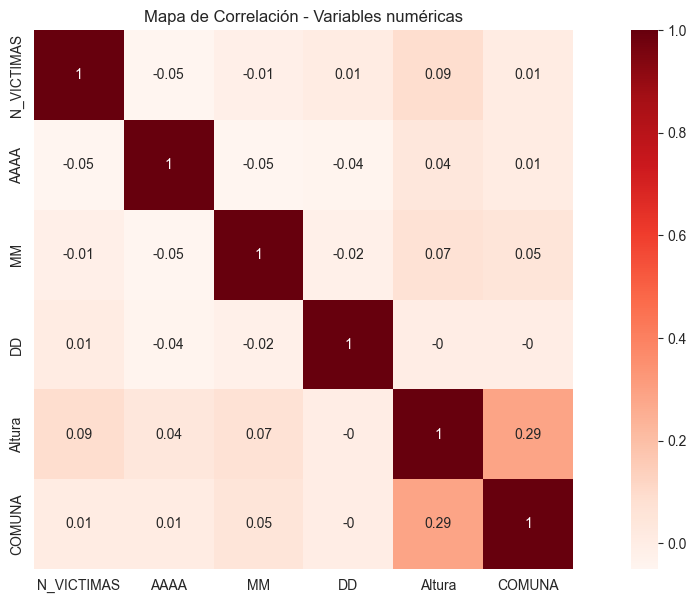

In [10]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = homicidios.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(15,7))
sns.heatmap(corr, cmap="Reds", annot=True, square=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

## **`Analisis Univariable`**

In [14]:
homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

### **`Frecuencia de Víctimas`**

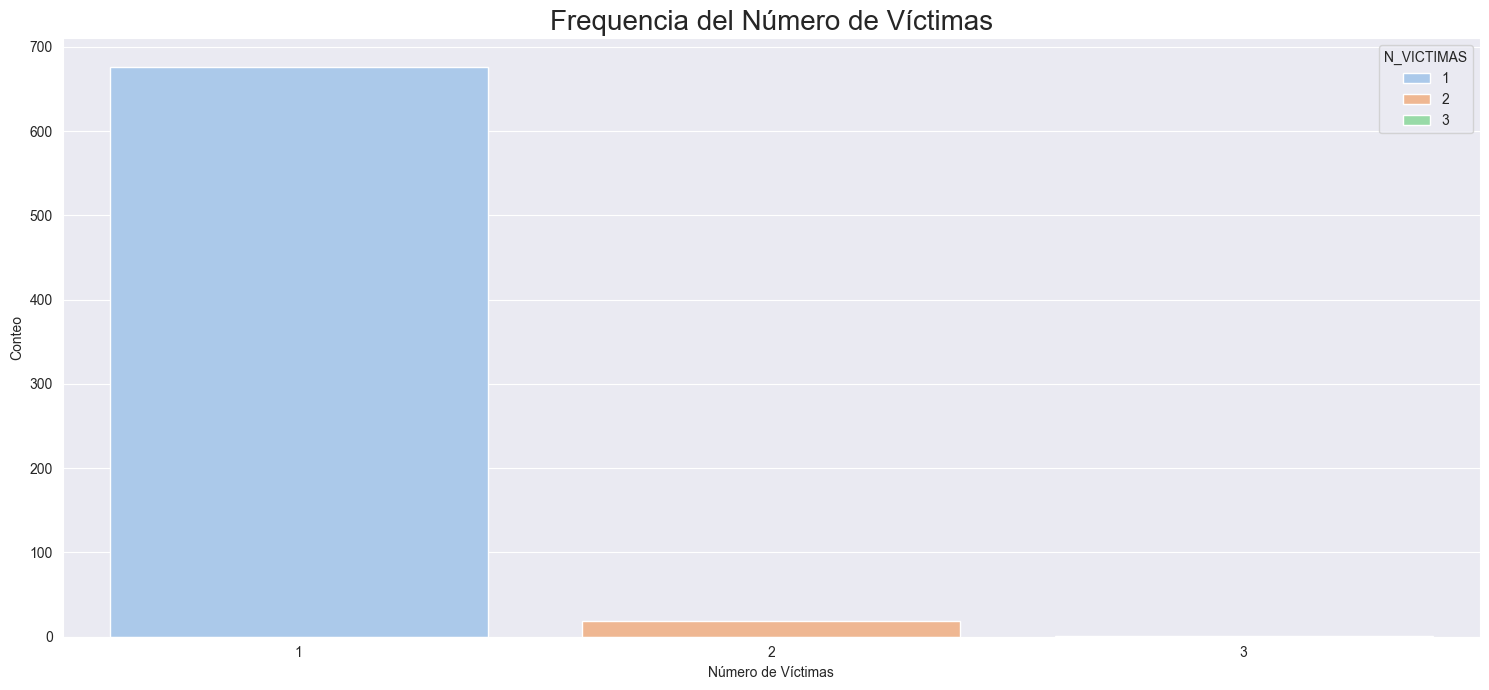

In [15]:
plt.figure(figsize=(15,7))

sns.countplot(data=homicidios, x='N_VICTIMAS', hue='N_VICTIMAS', palette='pastel')

plt.title("Frequencia del Número de Víctimas", fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Número de Víctimas")
plt.tight_layout()
plt.show()

### Observaciones:

- El número de víctimas más frecuente es uno, lo cual **podría** deberse a los buenos diseños de seguridad dentro de los vehiculos participantes, claramente es una hipótesis con muy poco respaldo y se necesitarían más datos de los cuales no se disponen; al menos en el dataset con el que se está trabajando.

### **`Año`**

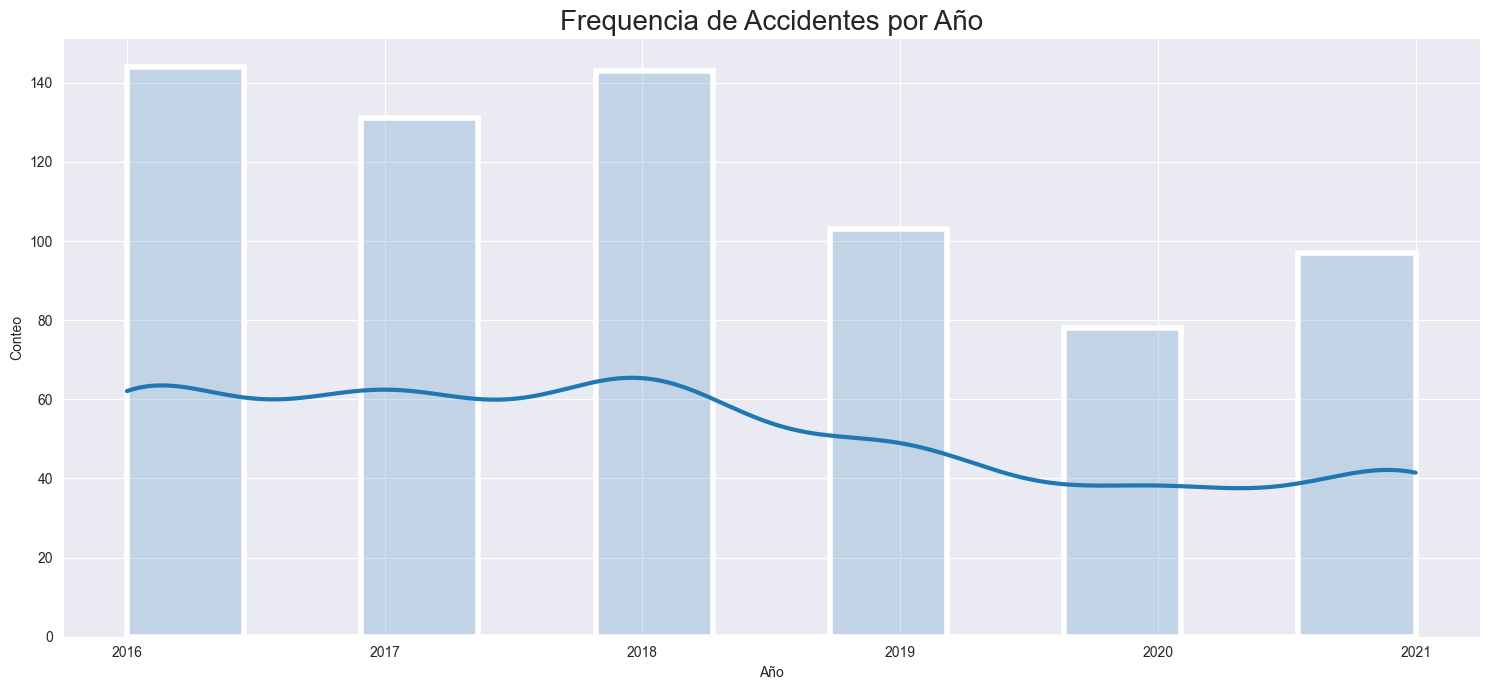

In [6]:
plt.figure(figsize=(15,7))

sns.histplot(data=homicidios, x='AAAA', kde=True, alpha=0.2, linewidth=4, line_kws={'linewidth':3})

plt.title("Frequencia de Accidentes por Año", fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Año")
plt.tight_layout()
plt.show()

### Observacioines:
 - Los accidentes tienden a bajar. Ésto puede ser debido a una estrategía bien ejecutada, bien planeada.

### **`Mes`**

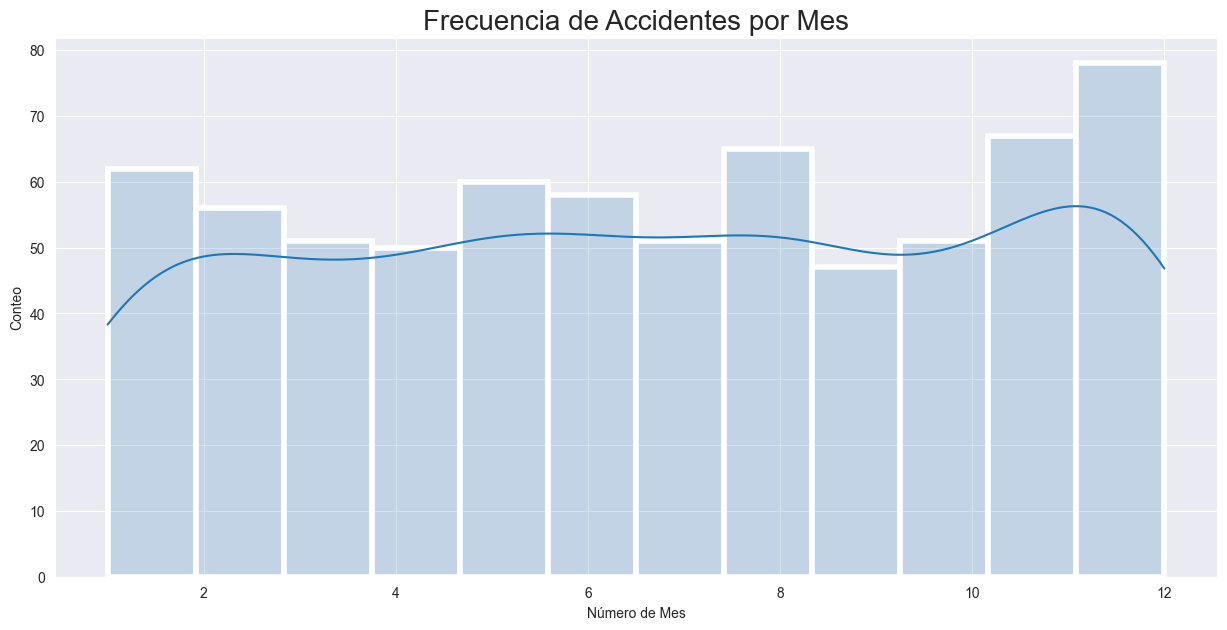

In [7]:
plt.figure(figsize=(15,7))

sns.histplot(data=homicidios, x='MM', kde=True, alpha=0.2, linewidth=4, bins=12)

plt.title("Frecuencia de Accidentes por Mes", fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Número de Mes")
plt.show()

### Observaciones:

- Los accidentes están uniformemente distribuidos por la mayoría del año, aunque en Diciembre se disparan repentinamente.

### **`Día`**

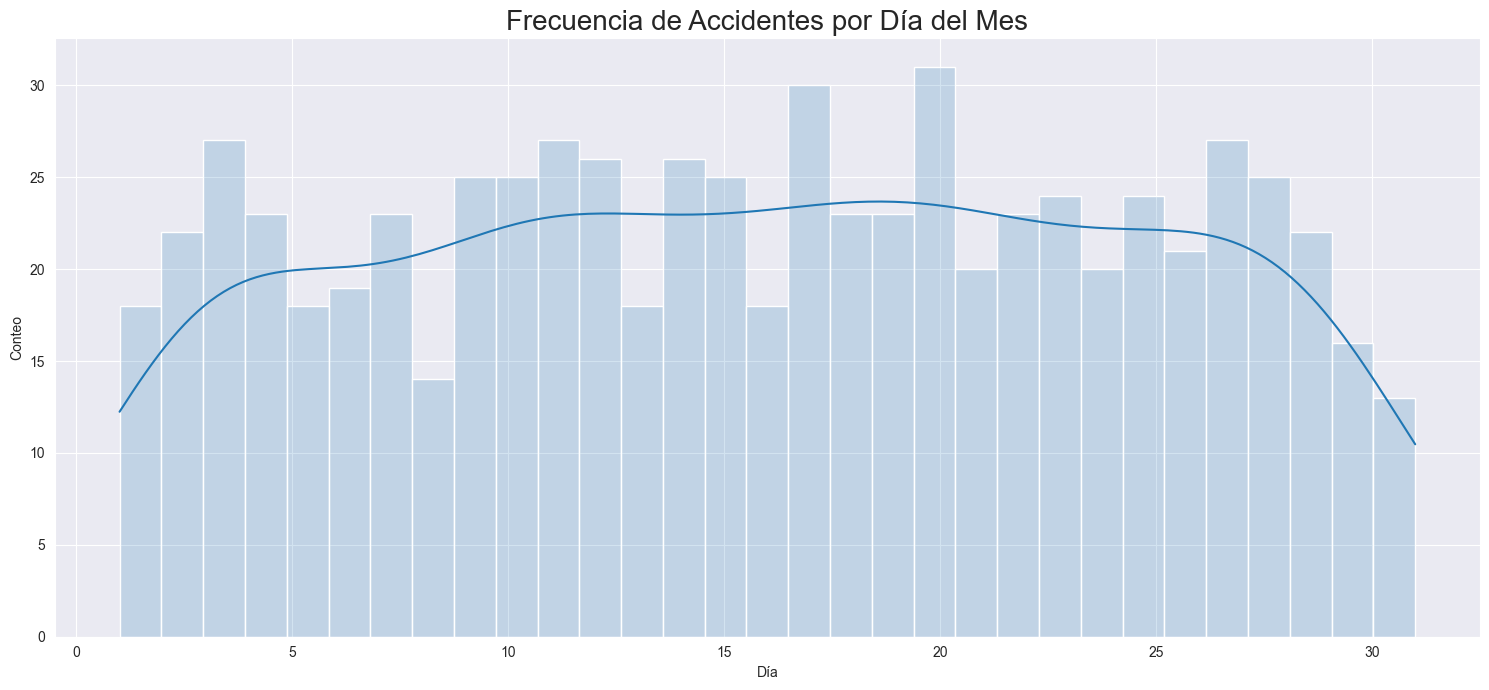

In [8]:
plt.figure(figsize=(15,7))

sns.histplot(data=homicidios, x='DD', kde=True, alpha=0.2, bins=31)

plt.title("Frecuencia de Accidentes por Día del Mes",fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Día")
plt.tight_layout()
plt.show()

### Observaciones:

- La distribución de los accidentes es mayormente uniforme con una pequeña alza a la mitad del mes.

### **`Hora`**

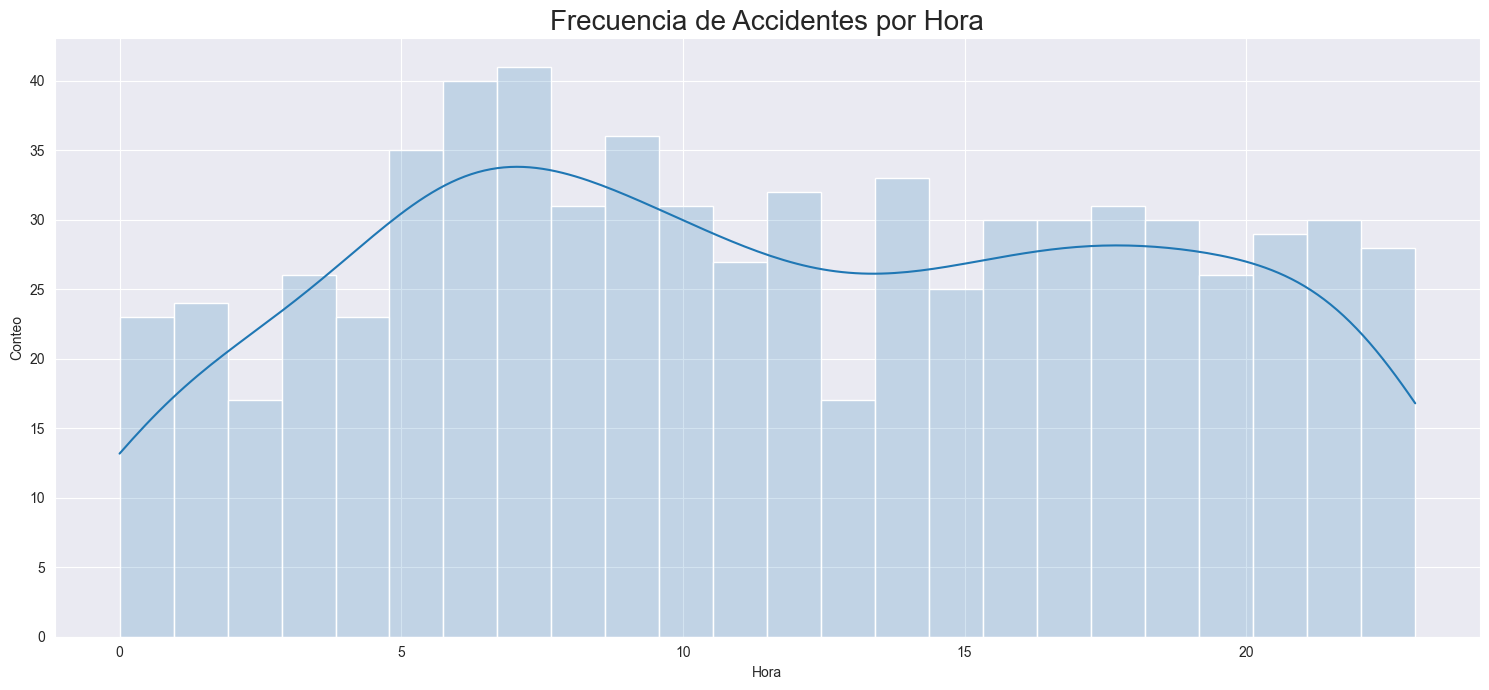

In [9]:
data = pd.to_numeric(homicidios[homicidios['HH']!='SD']['HH'])

plt.figure(figsize=(15,7))

sns.histplot(data=data, kde=True, alpha=0.2, bins=24)

plt.title("Frecuencia de Accidentes por Hora", fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Hora")
plt.tight_layout()
plt.show()

### Observaciones:

- La distribución de los accidentes es mayormente uniforme con una pequeña alza desde las 5 hrs a las 11 hrs.

### **`Lugar de Hecho`**

In [10]:
"Porcentaje de Lugares Únicos de la Varibale 'LUGAR_DEL_HECHO': " + str(int(homicidios['LUGAR_DEL_HECHO'].nunique()/len(homicidios)*100)) + "%"

"Porcentaje de Lugares Únicos de la Varibale 'LUGAR_DEL_HECHO': 98%"

### Observaciones:

- Parece no haber ningún patrón respecto a un lugar específico, lo cual es esperable, ya que teniendo en cuenta knjasd´mña

### **`Tipo de Calle`**

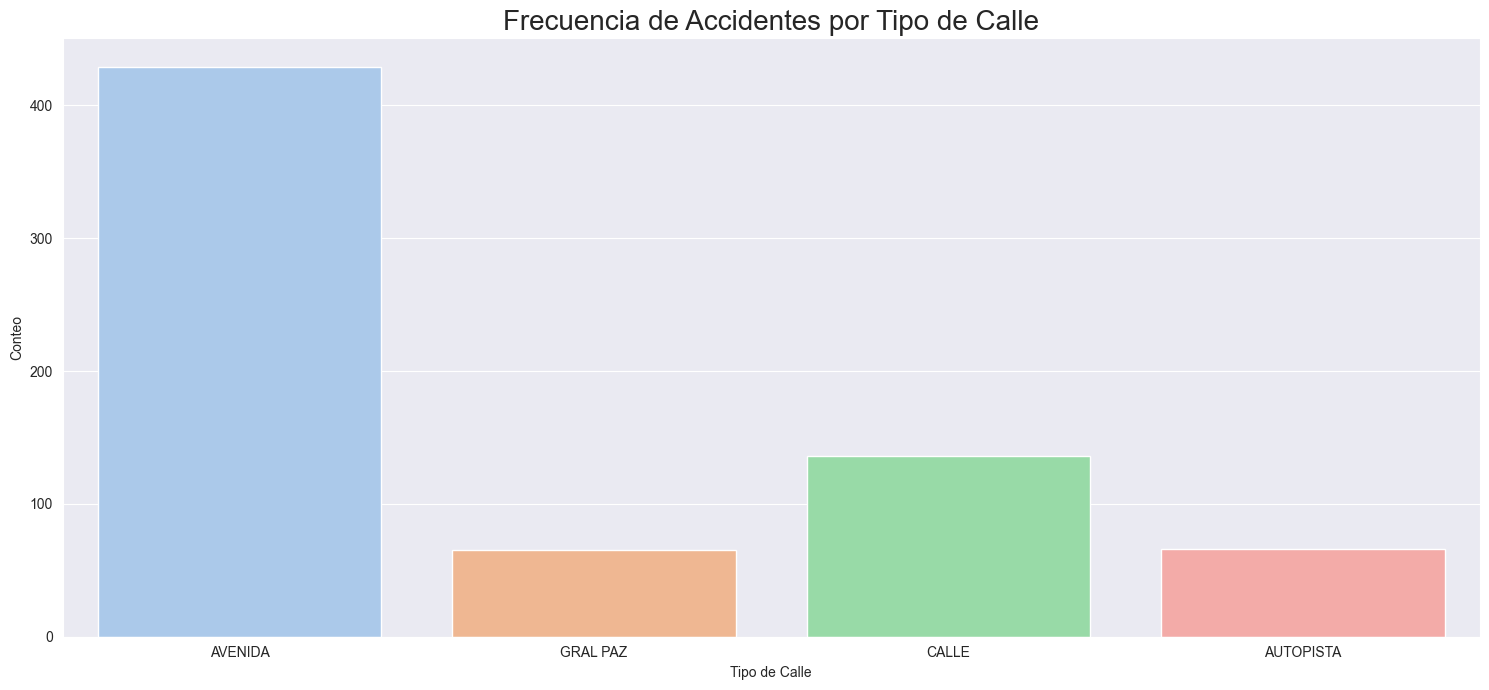

In [11]:
plt.figure(figsize=(15,7))

sns.countplot(data=homicidios, x='TIPO_DE_CALLE', hue='TIPO_DE_CALLE', palette='pastel', alpha=1)

plt.title("Frecuencia de Accidentes por Tipo de Calle", fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Tipo de Calle")
plt.tight_layout()
plt.show()

### Observaciones de "Tipo de Calle":

- Los accidentes más comunes pasan en avenidas, lo que parace coherente ya que son lugares con mucha afluencia vehicular.

### **`Altura`**

In [12]:
print("Porcentaje de Nulos de la variable 'Altura': " + str(int(homicidios[homicidios['Altura'].isnull()==True].shape[0]/len(homicidios)*100)) + "%")

Porcentaje de Nulos de la variable 'Altura': 81%


### Observaciones:
- Al tener un margen tan alto de nulos la variable no aporta información

### **`Dirección Normalizada`**

In [13]:
homicidios['Dirección Normalizada'].value_counts()

Dirección Normalizada
27 DE FEBRERO AV. y ESCALADA AV.                  5
PAZ, GRAL. AV. y BALBIN, RICARDO, DR. AV.         4
PAZ, GRAL. AV. y DEL LIBERTADOR AV.               4
INDEPENDENCIA AV. y CEVALLOS, VIRREY              3
ALCORTA, AMANCIO AV. y BONAVENA, OSCAR NATALIO    3
                                                 ..
AUTOPISTA PERITO MORENO y AUTOPISTA 25 DE MAYO    1
CHORROARIN y SAN MARTIN AV.                       1
COSQUIN y ROCA, CNEL. AV.                         1
ROCA, CNEL. AV. 3555                              1
PADRE CARLOS MUGICA 709                           1
Name: count, Length: 635, dtype: int64

### Observaciones:

- No hay ninguna dirección que tenga algún patrón, lo cual es esperable ya que de lo contrario podría representar un mal mantenimiento de la calle.

### **`Comuna`**

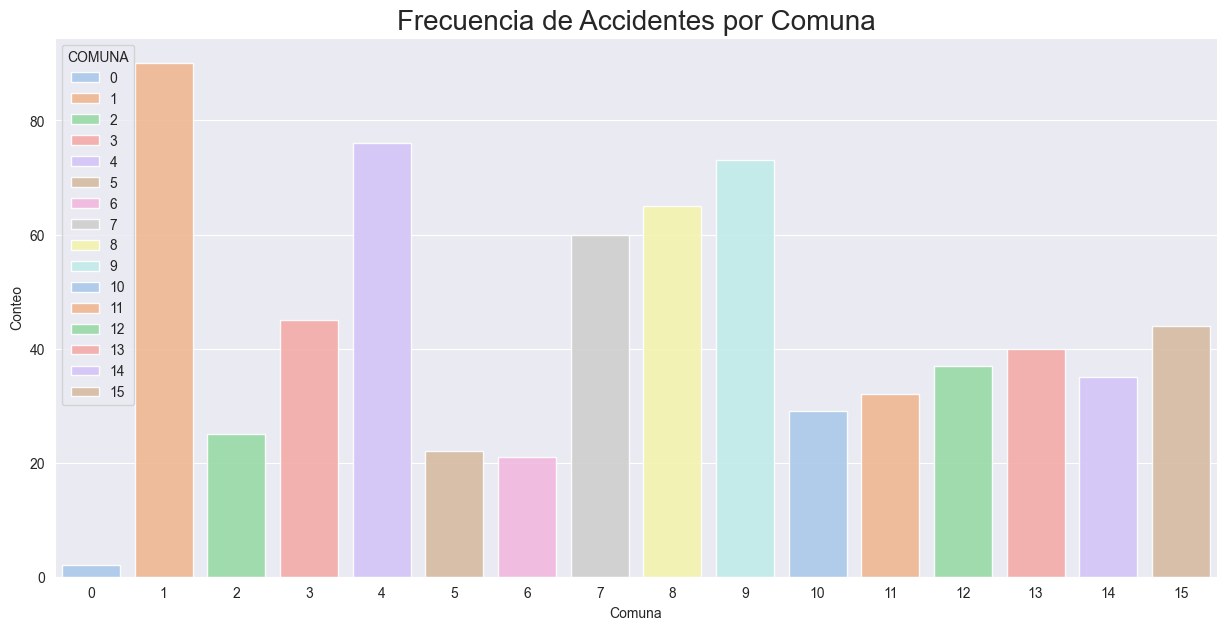

In [14]:
plt.figure(figsize=(15,7))

sns.countplot(data=homicidios, x='COMUNA', hue='COMUNA', palette='pastel', alpha=0.9)

plt.title("Frecuencia de Accidentes por Comuna", fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Comuna")
plt.show()

### Observaciones:

- Las comunas [1,4,7,8,9], tienen una extraña frecuencia de accidentes respecto a las demás comunas.

### **`Participantes`**

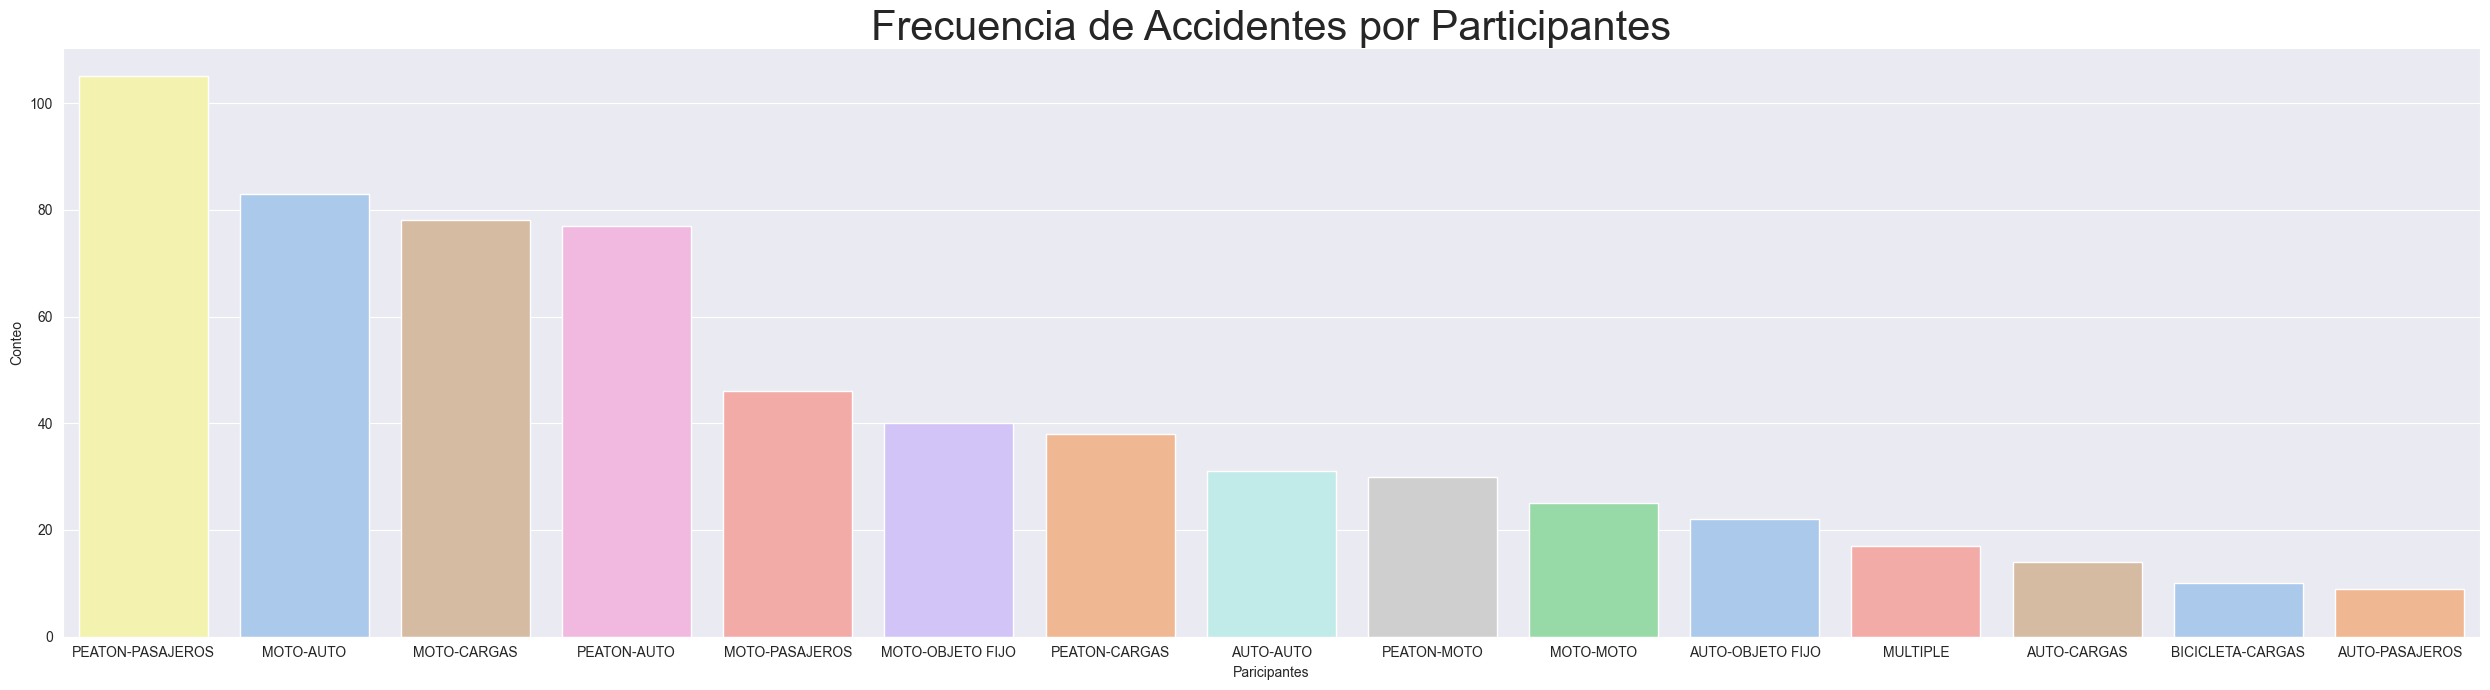

In [15]:
plt.figure(figsize=(25,7))

sns.countplot(data=homicidios, x='PARTICIPANTES', order=homicidios['PARTICIPANTES'].value_counts().index[:15], hue='PARTICIPANTES',palette='pastel')

plt.title("Frecuencia de Accidentes por Participantes", fontsize=30)
plt.ylabel("Conteo")
plt.xlabel("Paricipantes")
plt.tight_layout()
plt.show()

### Observaciones:

- De las 15 frecuencias más altas, 7 involucran a una moto. 
- En "PEATON-PASAJEROS", "PASAJEROS" es un valor muy ambiguo por lo que no aporta mucha información.

### **`Víctimas`**

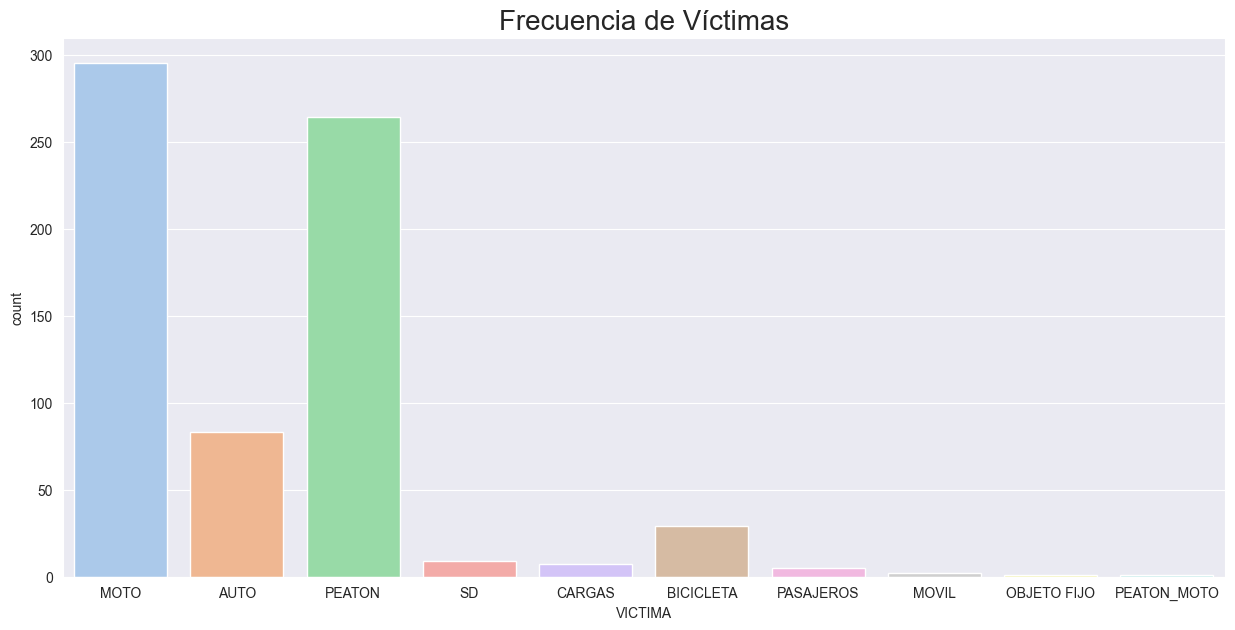

In [17]:
plt.figure(figsize=(15,7))

sns.countplot(data=homicidios, x='VICTIMA', hue='VICTIMA', palette='pastel', alpha=1)

plt.title("Frecuencia de Víctimas", fontsize=20)
plt.show()

### Observaciones:

- En ésta gráfica es mucho más notable la observación de la variable anterior respecto que las motos están muy involucradas, con ésta gráfica podemos verlas como víctimas.

### **`Acusado`**

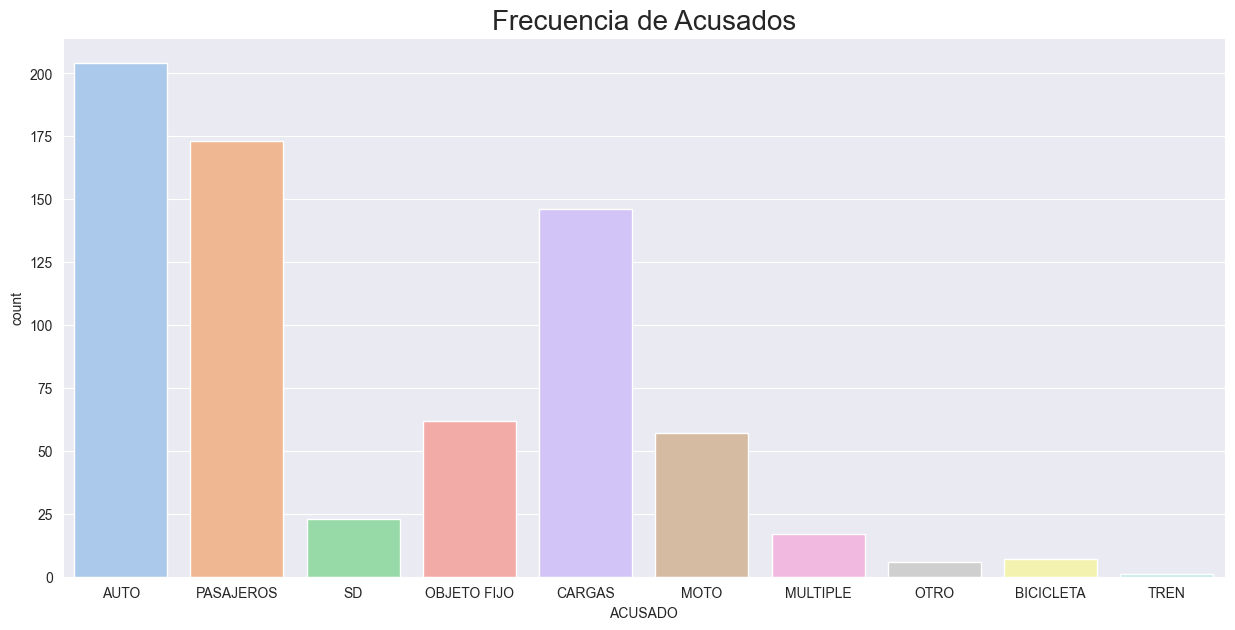

In [14]:
plt.figure(figsize=(15,7))

sns.countplot(data=homicidios, x='ACUSADO', hue='ACUSADO', palette='pastel', alpha=1)

plt.title("Frecuencia de Acusados", fontsize=20)
plt.show()

## Observaciones:
- Los autos y cargas tienen una alta frecuencia de accidentes
- Pasajeros y SD no representan mucha información, aún con su alta frecuencia.